<a href="https://colab.research.google.com/github/Kmmm0923/Training-TSLA/blob/9b1ae17982c45ec22e4a87a077a56b9e23428ee1/TSLA_Training_Simple.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" 
alt="Open In Colab"/></a>

In [19]:
import csv
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from dataclasses import dataclass 
from sklearn.preprocessing import MinMaxScaler

In [20]:
from google.colab import files
uploaded = files.upload()

Saving TSLA(Full).csv to TSLA(Full) (1).csv


In [81]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['TSLA(Full).csv']))

print(df2)

            Date    Open    High     Low   Close  Adj_Close     Volume
0     2018-01-09   22.34   22.59   21.83   22.25      22.25  107199000
1     2018-01-10   22.15   22.47   22.00   22.32      22.32   64648500
2     2018-01-11   22.35   22.99   22.22   22.53      22.53   99682500
3     2018-01-12   22.58   22.69   22.24   22.41      22.41   72376500
4     2018-01-16   22.50   23.00   22.32   22.67      22.67   97114500
...          ...     ...     ...     ...     ...        ...        ...
1253  2022-12-30  119.95  124.48  119.75  123.18     123.18  157304500
1254  2023-01-03  118.47  118.80  104.64  108.10     108.10  231402800
1255  2023-01-04  109.11  114.59  107.52  113.64     113.64  180389000
1256  2023-01-05  110.51  111.75  107.16  110.34     110.34  157986300
1257  2023-01-06  103.00  114.39  101.81  113.06     113.06  220575900

[1258 rows x 7 columns]


In [82]:
df3 = df2.copy()
print(df3)
print(df3.dtypes)

            Date    Open    High     Low   Close  Adj_Close     Volume
0     2018-01-09   22.34   22.59   21.83   22.25      22.25  107199000
1     2018-01-10   22.15   22.47   22.00   22.32      22.32   64648500
2     2018-01-11   22.35   22.99   22.22   22.53      22.53   99682500
3     2018-01-12   22.58   22.69   22.24   22.41      22.41   72376500
4     2018-01-16   22.50   23.00   22.32   22.67      22.67   97114500
...          ...     ...     ...     ...     ...        ...        ...
1253  2022-12-30  119.95  124.48  119.75  123.18     123.18  157304500
1254  2023-01-03  118.47  118.80  104.64  108.10     108.10  231402800
1255  2023-01-04  109.11  114.59  107.52  113.64     113.64  180389000
1256  2023-01-05  110.51  111.75  107.16  110.34     110.34  157986300
1257  2023-01-06  103.00  114.39  101.81  113.06     113.06  220575900

[1258 rows x 7 columns]
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float

In [83]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Date'] = df3['Date'].values.astype("float64")
print(df3)
print(df3.dtypes)

              Date    Open    High     Low   Close  Adj_Close     Volume
0     1.515456e+18   22.34   22.59   21.83   22.25      22.25  107199000
1     1.515542e+18   22.15   22.47   22.00   22.32      22.32   64648500
2     1.515629e+18   22.35   22.99   22.22   22.53      22.53   99682500
3     1.515715e+18   22.58   22.69   22.24   22.41      22.41   72376500
4     1.516061e+18   22.50   23.00   22.32   22.67      22.67   97114500
...            ...     ...     ...     ...     ...        ...        ...
1253  1.672358e+18  119.95  124.48  119.75  123.18     123.18  157304500
1254  1.672704e+18  118.47  118.80  104.64  108.10     108.10  231402800
1255  1.672790e+18  109.11  114.59  107.52  113.64     113.64  180389000
1256  1.672877e+18  110.51  111.75  107.16  110.34     110.34  157986300
1257  1.672963e+18  103.00  114.39  101.81  113.06     113.06  220575900

[1258 rows x 7 columns]
Date         float64
Open         float64
High         float64
Low          float64
Close        fl

In [84]:
df3 = df3[['Date', 'Open', 'Close']]
print(df3)

              Date    Open   Close
0     1.515456e+18   22.34   22.25
1     1.515542e+18   22.15   22.32
2     1.515629e+18   22.35   22.53
3     1.515715e+18   22.58   22.41
4     1.516061e+18   22.50   22.67
...            ...     ...     ...
1253  1.672358e+18  119.95  123.18
1254  1.672704e+18  118.47  108.10
1255  1.672790e+18  109.11  113.64
1256  1.672877e+18  110.51  110.34
1257  1.672963e+18  103.00  113.06

[1258 rows x 3 columns]


Text(0.5, 1.0, 'Summary Graph')

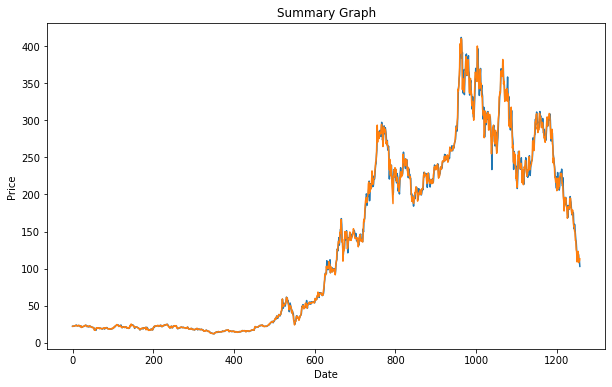

In [85]:
plt.figure(figsize = (10,6))
plt.plot(df3['Open'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df3['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Summary Graph')

In [86]:
ms = MinMaxScaler()
df3 = ms.fit_transform(df3)

df3.shape


(1258, 3)

In [87]:
#set training size (85% of data)
train_size = round(len(df3)*0.85)

stock_train = df3[:train_size]
stock_vaild = df3[train_size:]

print(train_size)
print(stock_train.shape, stock_vaild.shape)

1069
(1069, 3) (189, 3)


In [88]:
def Sequence(data):
  sequences = []
  labels = []

  start = 0

  for stop in range (30, len(data)):
    sequences.append(data[start:stop])
    labels.append(data[stop])
    start += 1

  return (np.array(sequences), np.array(labels))

In [89]:
train_squence, train_label = Sequence(stock_train)
vaild_squence, vaild_label = Sequence(stock_vaild)

train_squence.shape, train_label.shape, vaild_squence.shape, vaild_label.shape

((1039, 30, 3), (1039, 3), (159, 30, 3), (159, 3))

## **Create LSTM Model**

In [90]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences = True, input_shape = (train_squence.shape[1], train_squence.shape[2])),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3)
])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=["mae"])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 64)            17408     
                                                                 
 lstm_19 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 50,627
Trainable params: 50,627
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(train_squence, train_label, epochs=30,validation_data=(vaild_squence, vaild_label), verbose=1)

Epoch 1/30
33/33 [==============================] - 6s 73ms/step - loss: 0.0300 - mae: 0.1084 - val_loss: 0.0076 - val_mae: 0.0724
Epoch 2/30
33/33 [==============================] - 1s 41ms/step - loss: 0.0035 - mae: 0.0415 - val_loss: 0.0100 - val_mae: 0.0813
Epoch 3/30
33/33 [==============================] - 1s 41ms/step - loss: 0.0022 - mae: 0.0325 - val_loss: 0.0046 - val_mae: 0.0588
Epoch 4/30
33/33 [==============================] - 1s 44ms/step - loss: 0.0021 - mae: 0.0293 - val_loss: 0.0043 - val_mae: 0.0570
Epoch 5/30
33/33 [==============================] - 1s 42ms/step - loss: 0.0021 - mae: 0.0293 - val_loss: 0.0053 - val_mae: 0.0632
Epoch 6/30
33/33 [==============================] - 1s 42ms/step - loss: 0.0019 - mae: 0.0279 - val_loss: 0.0062 - val_mae: 0.0698
Epoch 7/30
33/33 [==============================] - 1s 41ms/step - loss: 0.0017 - mae: 0.0265 - val_loss: 0.0039 - val_mae: 0.0544
Epoch 8/30
33/33 [==============================] - 1s 41ms/step - loss: 0.0017 - m

In [92]:
test_predict = model.predict(vaild_squence)
test_predict[:10]

5/5 [==============================] - 1s 12ms/step


array([[0.8620918 , 0.5893634 , 0.5848665 ],
       [0.8633914 , 0.5799461 , 0.57595277],
       [0.864413  , 0.56924576, 0.5654406 ],
       [0.8651274 , 0.5555026 , 0.55211616],
       [0.866133  , 0.54397553, 0.54051894],
       [0.8681238 , 0.5414707 , 0.5374006 ],
       [0.8711451 , 0.5515768 , 0.54666823],
       [0.8743176 , 0.56914556, 0.56392217],
       [0.87647474, 0.58565414, 0.58072287],
       [0.8779347 , 0.6013648 , 0.5966286 ]], dtype=float32)

In [93]:
test_inverse = ms.inverse_transform(test_predict)
test_inverse[:10]

array([[1.6512416e+18, 2.4746175e+02, 2.4473026e+02],
       [1.6514464e+18, 2.4370047e+02, 2.4118224e+02],
       [1.6516073e+18, 2.3942676e+02, 2.3699797e+02],
       [1.6517198e+18, 2.3393773e+02, 2.3169431e+02],
       [1.6518781e+18, 2.2933383e+02, 2.2707816e+02],
       [1.6521917e+18, 2.2833340e+02, 2.2583693e+02],
       [1.6526677e+18, 2.3236977e+02, 2.2952582e+02],
       [1.6531674e+18, 2.3938673e+02, 2.3639357e+02],
       [1.6535072e+18, 2.4598027e+02, 2.4308092e+02],
       [1.6537370e+18, 2.5225510e+02, 2.4941205e+02]], dtype=float32)

## **Visualize and predict actual data**